# Analysis3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import csv
import xlrd
%matplotlib inline

In [2]:
import sys, os, datetime
path = os.getcwd()+'\\data\\analysis3\\ONTIME.csv'
path1 = os.getcwd()+'\\data\\airports new2.csv'

In [3]:
book  = xlrd.open_workbook('airports_new.xlt')
sheet = book.sheet_by_index(0)
airport_data = [[sheet.cell_value(i,j) for j in range(sheet.ncols)] for i in range(sheet.nrows)]

#Convert to dict
airport_dict = {}
for j in range(len(airport_data[0])):
    key = airport_data[0][j]
    airport_dict[key] = [airport_data[i][j] for i in range(1,len(airport_data))]

book = xlrd.open_workbook('carriers.xls')
sheet = book.sheet_by_index(0)
#every other row in 'carrriers.xls' sheet is empty'
carrier_data = [[sheet.cell_value(i,j) for j in range(sheet.ncols)]
                for i in range(0,sheet.nrows,2)]
#convert to dictionary for easy look-up
carrier_dict = {}
for j in range(len(carrier_data[0])):
    key = carrier_data[0][j]
    carrier_dict[key] = [carrier_data[i][j] for i in range(1,len(carrier_data))]

print('Fields in the additional carrier data set:')
print('-----------------------------------------')
for key in carrier_dict.keys():
    print(key)
print('')
print('Fields in the additional airport data set:')
print('-----------------------------------------')
for key in airport_dict.keys():
    print(key)

Fields in the additional carrier data set:
-----------------------------------------
Description
Code

Fields in the additional airport data set:
-----------------------------------------
iata
airport
long
city
country
state
lat


In [4]:
delay_data = []
f = open('Jan2017_ONTIME.csv', 'r')
reader = csv.reader(f)
delay_data_header = next(reader,None)
for row in reader:
    delay_data.append(row)
f.close()

In [5]:
for i,s in enumerate(delay_data_header):
    print(str(i) + ': ' + s)

0: MONTH
1: DAY_OF_MONTH
2: DAY_OF_WEEK
3: UNIQUE_CARRIER
4: ORIGIN
5: ORIGIN_CITY_NAME
6: ORIGIN_STATE_ABR
7: DEST
8: DEST_CITY_NAME
9: DEST_STATE_ABR
10: DEP_TIME
11: DEP_DELAY
12: TAXI_OUT
13: TAXI_IN
14: ARR_TIME
15: ARR_DELAY
16: CANCELLED
17: ACTUAL_ELAPSED_TIME
18: AIR_TIME
19: DISTANCE
20: CARRIER_DELAY
21: WEATHER_DELAY
22: NAS_DELAY
23: SECURITY_DELAY
24: LATE_AIRCRAFT_DELAY
25: 


In [6]:
delay_data = [d[:-1] for d in delay_data]
delay_data_header = delay_data_header[:-1]

In [7]:
#remove cancelled flights
delay_data = [d for d in delay_data if d[16] != '1.00']

In [8]:
#determine the rows with missing data:
rows_with_missing_data = []
for i in range(len(delay_data)):
    for j in range(20):
        if len(delay_data[i][j]) == 0:
            rows_with_missing_data.append(i)
            break

In [9]:
i = rows_with_missing_data[0]
print('Example row in the data with missing entries:\n')
for j in range(len(delay_data[i])):
    print(delay_data_header[j] + ': ' + str(delay_data[i][j]))

Example row in the data with missing entries:

MONTH: 1
DAY_OF_MONTH: 27
DAY_OF_WEEK: 5
UNIQUE_CARRIER: AA
ORIGIN: CLT
ORIGIN_CITY_NAME: Charlotte, NC
ORIGIN_STATE_ABR: NC
DEST: TPA
DEST_CITY_NAME: Tampa, FL
DEST_STATE_ABR: FL
DEP_TIME: 1646
DEP_DELAY: 6.00
TAXI_OUT: 26.00
TAXI_IN: 3.00
ARR_TIME: 2044
ARR_DELAY: 
CANCELLED: 0.00
ACTUAL_ELAPSED_TIME: 
AIR_TIME: 
DISTANCE: 507.00
CARRIER_DELAY: 
WEATHER_DELAY: 
NAS_DELAY: 
SECURITY_DELAY: 
LATE_AIRCRAFT_DELAY: 


In [10]:
#remove rows with missing entries:
delay_data = [delay_data[i] for i in range(len(delay_data)) if i not in rows_with_missing_data]

In [11]:
float_index = set([11,12,13,15,17,18,19,20,21,22,23,24])
for i in range(len(delay_data)):
    for j in float_index:
        if len(delay_data[i][j]) > 0:
            try:
                delay_data[i][j] = float(delay_data[i][j])
            except ValueError:
                #print('Line {i} is corrupt!'.format(i = index)'
                break
        else:
            #delay type fields
            delay_data[i][j] = 0.0
            
int_index = set([1,2])
for i in range(len(delay_data)):
    for j in int_index:
        delay_data[i][j] = int(delay_data[i][j])

In [12]:
delay_data

[['1',
  7,
  6,
  'AA',
  'DFW',
  'Dallas/Fort Worth, TX',
  'TX',
  'LAS',
  'Las Vegas, NV',
  'NV',
  '1051',
  -4.0,
  15.0,
  7.0,
  '1148',
  -6.0,
  '0.00',
  177.0,
  155.0,
  1055.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 ['1',
  8,
  7,
  'AA',
  'DFW',
  'Dallas/Fort Worth, TX',
  'TX',
  'LAS',
  'Las Vegas, NV',
  'NV',
  '1055',
  0.0,
  15.0,
  5.0,
  '1149',
  -5.0,
  '0.00',
  174.0,
  154.0,
  1055.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 ['1',
  1,
  7,
  'AA',
  'ORD',
  'Chicago, IL',
  'IL',
  'DFW',
  'Dallas/Fort Worth, TX',
  'TX',
  '0705',
  -5.0,
  12.0,
  14.0,
  '0932',
  -16.0,
  '0.00',
  147.0,
  121.0,
  802.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 ['1',
  2,
  1,
  'AA',
  'ORD',
  'Chicago, IL',
  'IL',
  'DFW',
  'Dallas/Fort Worth, TX',
  'TX',
  '0709',
  -1.0,
  14.0,
  6.0,
  '0946',
  -2.0,
  '0.00',
  157.0,
  137.0,
  802.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 ['1',
  3,
  2,
  'AA',
  'ORD',
  'Chicago, IL',
  'IL',
  'DFW',
  'Dallas/Fort Wo

In [13]:
#get the list of unique carrires:
carrier_ID = set()
airport_ID = set()
for d in delay_data:
    carrier_ID.add(d[3])
    airport_ID.add(d[4])
    airport_ID.add(d[7])
    
#count total arrivals and departures from each airport
flight_count_dict = {iata: 0 for iata in airport_ID}
for d in delay_data:
    flight_count_dict[d[4]] += 1
    flight_count_dict[d[7]] += 1

pairs = []
for key, value in flight_count_dict.items():
    pairs.append((key,value))

#sort airports according to 
pairs.sort(key = lambda x: x[1], reverse = True)

In [14]:
pairs

[('ATL', 58758),
 ('ORD', 36794),
 ('LAX', 33945),
 ('DEN', 33395),
 ('DFW', 30024),
 ('PHX', 26134),
 ('SFO', 25349),
 ('LAS', 24592),
 ('MCO', 21634),
 ('IAH', 21300),
 ('SEA', 19971),
 ('MSP', 18998),
 ('DTW', 18986),
 ('BOS', 18486),
 ('EWR', 18088),
 ('SLC', 17944),
 ('CLT', 17689),
 ('FLL', 15278),
 ('JFK', 15157),
 ('BWI', 14953),
 ('LGA', 14319),
 ('MDW', 12749),
 ('SAN', 12284),
 ('DCA', 11977),
 ('MIA', 11733),
 ('TPA', 11668),
 ('DAL', 11493),
 ('PHL', 11307),
 ('STL', 9079),
 ('HOU', 8850),
 ('PDX', 8742),
 ('BNA', 8357),
 ('OAK', 7778),
 ('HNL', 7582),
 ('AUS', 7410),
 ('SJC', 7151),
 ('MSY', 6965),
 ('MCI', 6893),
 ('SNA', 6602),
 ('SMF', 6571),
 ('RSW', 6434),
 ('RDU', 5153),
 ('CLE', 5117),
 ('IAD', 5076),
 ('SAT', 4961),
 ('MKE', 4957),
 ('PBI', 4803),
 ('SJU', 4780),
 ('PIT', 4155),
 ('IND', 4104),
 ('OGG', 3948),
 ('BUR', 3792),
 ('CMH', 3704),
 ('BDL', 3429),
 ('ONT', 3294),
 ('OMA', 3018),
 ('TUS', 2839),
 ('ABQ', 2753),
 ('JAX', 2682),
 ('BUF', 2664),
 ('LGB', 257

In [15]:
flight_count_dict

{'ABE': 374,
 'ABI': 54,
 'ABQ': 2753,
 'ABR': 119,
 'ABY': 161,
 'ACT': 197,
 'ACV': 169,
 'ACY': 645,
 'ADK': 18,
 'ADQ': 80,
 'AEX': 492,
 'AGS': 375,
 'ALB': 1513,
 'AMA': 488,
 'ANC': 2381,
 'APN': 83,
 'ASE': 1193,
 'ATL': 58758,
 'ATW': 398,
 'AUS': 7410,
 'AVL': 405,
 'AVP': 190,
 'AZO': 281,
 'BDL': 3429,
 'BET': 154,
 'BFL': 350,
 'BGM': 108,
 'BHM': 1775,
 'BIL': 472,
 'BIS': 215,
 'BJI': 124,
 'BLI': 151,
 'BMI': 217,
 'BNA': 8357,
 'BOI': 2385,
 'BOS': 18486,
 'BPT': 9,
 'BQK': 158,
 'BQN': 314,
 'BRD': 106,
 'BRO': 211,
 'BRW': 149,
 'BTM': 107,
 'BTR': 980,
 'BTV': 550,
 'BUF': 2664,
 'BUR': 3792,
 'BWI': 14953,
 'BZN': 688,
 'CAE': 641,
 'CAK': 969,
 'CDC': 104,
 'CDV': 101,
 'CHA': 802,
 'CHO': 415,
 'CHS': 1879,
 'CID': 645,
 'CIU': 95,
 'CLE': 5117,
 'CLL': 214,
 'CLT': 17689,
 'CMH': 3704,
 'CMX': 99,
 'COD': 118,
 'COS': 1450,
 'CPR': 135,
 'CRP': 396,
 'CRW': 360,
 'CSG': 149,
 'CVG': 2055,
 'CWA': 111,
 'DAB': 298,
 'DAL': 11493,
 'DAY': 740,
 'DCA': 11977,
 'DEN

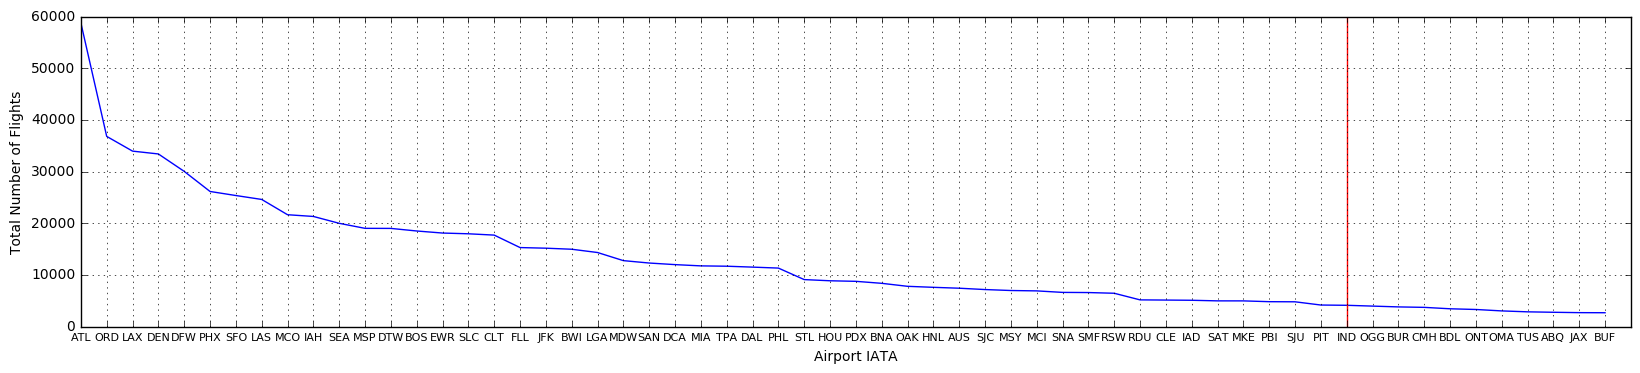


Use data from 50 most busy airports according to number of total incoming and outgoing domestic flights


In [16]:
c = [c for a,c in pairs]
a = [a for a,c in pairs]
plt.figure(figsize = (20,4))
N = 60
plt.plot(c[:N])
plt.xticks(range(N), a[:N], fontsize = 8)
plt.ylabel('Total Number of Flights')
plt.xlabel('Airport IATA')
plt.grid()
plt.axvline(49, color = 'r')
plt.show()

print('\n'+'Use data from 50 most busy airports according to number of total incoming and outgoing domestic flights')


# Remove data from non busy airports

In [17]:
airports_to_keep = [a for a,c in pairs[:52]]
delay_data2 = [d for d in delay_data if (d[4] in airports_to_keep and d[7] in airports_to_keep)]
print('Size of the dataset is reduced from ' + str(len(delay_data)) + ' to ' + str(len(delay_data2)))
#let's delete the large dataset
delay_data = delay_data2

Size of the dataset is reduced from 439645 to 296726


In [18]:
#find out carrier names from carrier_data
carrier_info = {}
for code in carrier_ID:
    k = carrier_dict['Code'].index(code)
    carrier_info[code] = carrier_dict['Description'][k]

In [21]:
airport_info = {}
for iata in airports_to_keep:
    k = airport_dict['iata'].index(iata)
    airport_info[iata] = {key: airport_dict[key][k] for key in airport_dict.keys()}

In [23]:
delay_data_dict = {}
for j in range(len(delay_data_header)):
    key = delay_data_header[j]
    delay_data_dict[key] = [delay_data[i][j] for i in range(len(delay_data))]
for key in delay_data_dict.keys():
    print(key)

DEST
LATE_AIRCRAFT_DELAY
SECURITY_DELAY
TAXI_OUT
DEST_CITY_NAME
ACTUAL_ELAPSED_TIME
ORIGIN_CITY_NAME
AIR_TIME
TAXI_IN
UNIQUE_CARRIER
DEP_TIME
ARR_DELAY
ORIGIN_STATE_ABR
DISTANCE
CANCELLED
DEP_DELAY
CARRIER_DELAY
DAY_OF_MONTH
WEATHER_DELAY
MONTH
DAY_OF_WEEK
NAS_DELAY
ORIGIN
ARR_TIME
DEST_STATE_ABR


In [24]:
carrier_info

{'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines Inc.',
 'HA': 'Hawaiian Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'OO': 'Skywest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.'}

In [25]:
N = len(delay_data_dict['ORIGIN']) # N: sample size
carrier_performance = {}
airport_performance = {}

#airport on time performance
for airport in airport_info.keys():
    #departures:
    ind = [i for i in range(N) if delay_data_dict['DEST'][i] == airport]
    total_flights   = len(ind)
    on_time_flights = sum( [delay_data_dict['DEP_DELAY'][i] <= 15 for i in ind] )
    #arrivals:
    ind = [i for i in range(N) if delay_data_dict['ORIGIN'][i] == airport]
    total_flights   += len(ind)
    on_time_flights += sum( [delay_data_dict['ARR_DELAY'][i] - delay_data_dict['DEP_DELAY'][i] <= 15 for i in ind] )

    if total_flights > 0:
        airport_performance[airport] = {'total_flights': total_flights,
                                        'on_time_flights': on_time_flights,
                                        'on_time_ratio': on_time_flights/total_flights} 

#carreir on time performance        
for carrier in carrier_info.keys():
    #departures:
    ind = [i for i in range(N) if delay_data_dict['UNIQUE_CARRIER'][i] == carrier]
    total_flights   = len(ind)
    on_time_flights = sum( [delay_data_dict['DEP_DELAY'][i] <= 15 for i in ind] )
    
    if total_flights > 0:
        carrier_performance[carrier] = {'total_flights': total_flights,
                                        'on_time_flights': on_time_flights,
                                        'on_time_ratio': on_time_flights/total_flights}

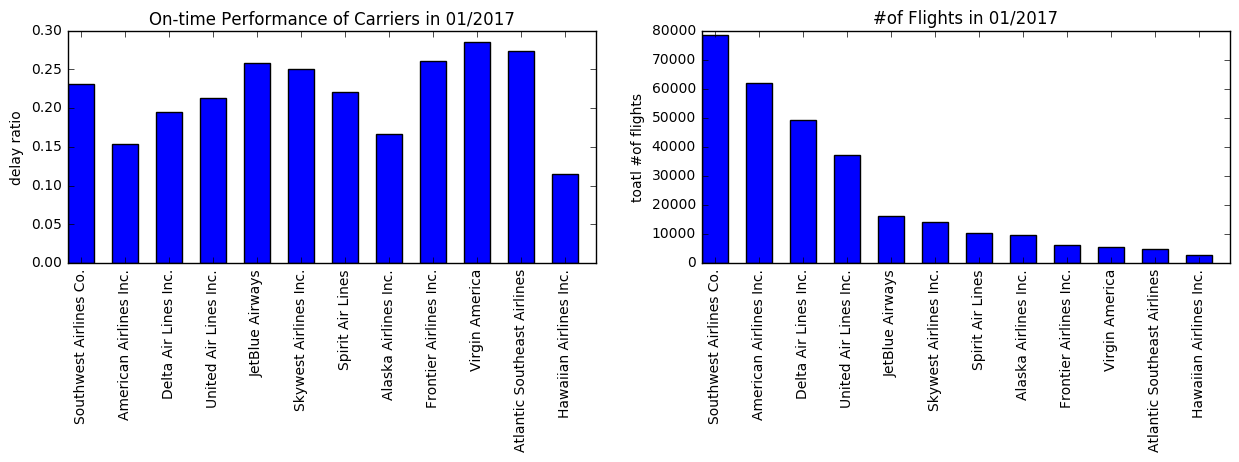

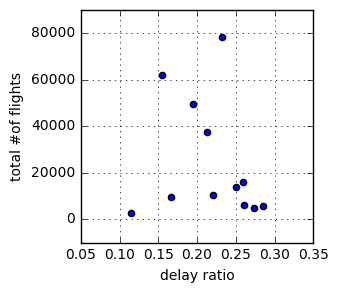

In [30]:
name = []
code = []
on_time = []
flights = []
for key in carrier_performance.keys():
    code.append(key)
    name.append(carrier_info[key])
    on_time.append(carrier_performance[key]['on_time_ratio'])
    flights.append(carrier_performance[key]['total_flights'])

name, code, on_time, flights = zip( *sorted( zip(name, code, on_time, flights), key = lambda x: x[3], reverse = True ) )

fig = plt.figure(figsize = (15,3))
width = .6
ax1 = plt.subplot(121)
ax1.bar(range(len(on_time)), [1- v for v in on_time], width = width)
ax1.set_xticks(np.arange(len(on_time)) + width/2)
ax1.set_xticklabels(name, rotation = 90)
ax1.set_title('On-time Performance of Carriers in 01/2017')
ax1.set_ylabel('delay ratio')

ax2 = plt.subplot(122)
ax2.bar(range(len(on_time)), flights, width = width)
ax2.set_xticks(np.arange(len(on_time)) + width/2)
ax2.set_xticklabels(name, rotation = 90)
ax2.set_ylabel('toatl #of flights')
ax2.set_title('#of Flights in 01/2017')
plt.show()

fig = plt.figure(figsize=(3,3))
plt.scatter([1- v for v in on_time], flights)
#plt.xticks([0.14, 0.16, 0.20, 0.26])
plt.xlabel('delay ratio')
plt.ylabel('total #of flights')
plt.grid()
plt.show()

In [26]:
lat = []
lon = []
name = []
on_time = []
flights = []
for key in airport_performance.keys():
    name.append(airport_info[key]['airport'])
    lat.append(airport_info[key]['lat'])
    lon.append(airport_info[key]['long'])
    on_time.append(airport_performance[key]['on_time_ratio'])
    flights.append(airport_performance[key]['total_flights'])

In [27]:
airport_performance

{'ATL': {'on_time_flights': 29217,
  'on_time_ratio': 0.883035633330311,
  'total_flights': 33087},
 'AUS': {'on_time_flights': 6057,
  'on_time_ratio': 0.8545428893905191,
  'total_flights': 7088},
 'BNA': {'on_time_flights': 6647,
  'on_time_ratio': 0.857566765578635,
  'total_flights': 7751},
 'BOS': {'on_time_flights': 14926,
  'on_time_ratio': 0.8601890272014754,
  'total_flights': 17352},
 'BUR': {'on_time_flights': 3204,
  'on_time_ratio': 0.8449367088607594,
  'total_flights': 3792},
 'BWI': {'on_time_flights': 9991,
  'on_time_ratio': 0.8764035087719299,
  'total_flights': 11400},
 'CLE': {'on_time_flights': 4364,
  'on_time_ratio': 0.852843462966582,
  'total_flights': 5117},
 'CLT': {'on_time_flights': 13565,
  'on_time_ratio': 0.8978092527632537,
  'total_flights': 15109},
 'DAL': {'on_time_flights': 7900,
  'on_time_ratio': 0.8627279676750027,
  'total_flights': 9157},
 'DCA': {'on_time_flights': 9877,
  'on_time_ratio': 0.8733751879034397,
  'total_flights': 11309},
 'DEN

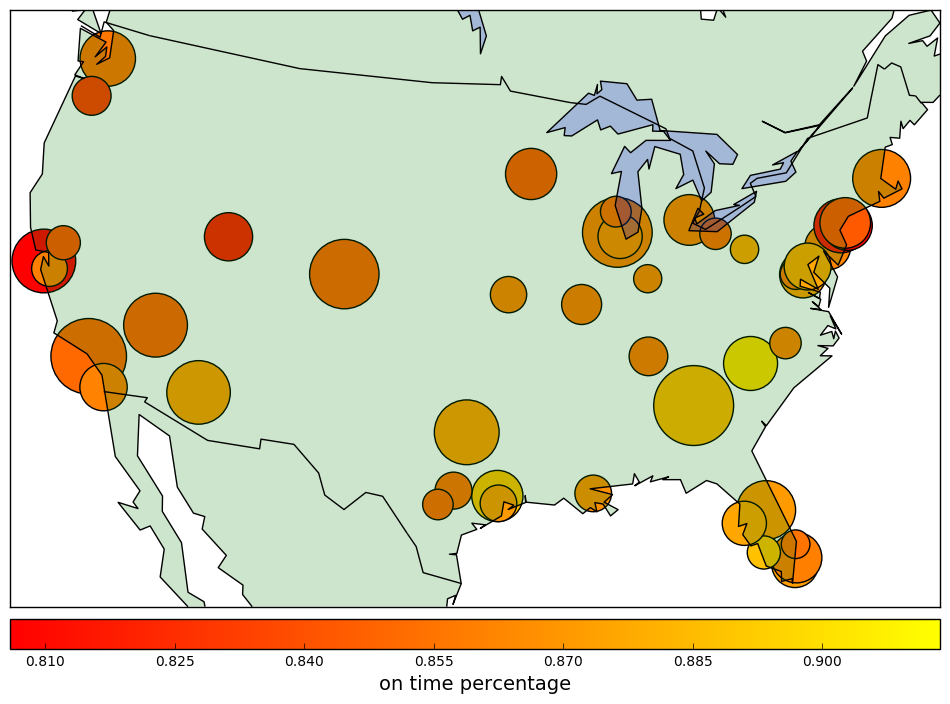

In [28]:
fig = plt.figure(figsize=[12,10])
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawcoastlines(linewidth=1)
m.fillcontinents(color = 'green', lake_color = 'blue', alpha = 0.2)
m.drawcountries(linewidth=1)
x,y = m(lon, lat)

im = m.scatter(x,y, marker = 'o', s = np.array(flights)/10, c = on_time,
          cmap = 'autumn')
cb = m.colorbar(im,'bottom')
cb.set_label('on time percentage', fontsize = '14')
plt.show()